# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd 
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips["tips_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

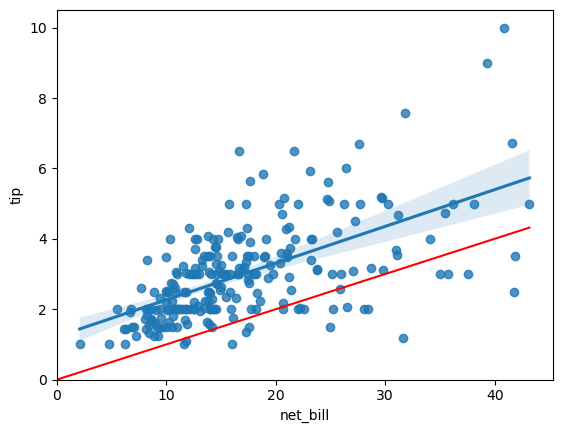

In [3]:
sns.regplot(y = "tip", x = "net_bill", data = tips[tips["tips_pct"]<.5])
x = np.linspace(0, tips["net_bill"].max(), 100)
y = .1*x
plt.plot(x, y, "-r", label="linha dos 10%")
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [4]:
reg = smf.ols("tip ~ net_bill", data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           5.02e-23
Time:                        03:35:46   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [5]:
tips = sns.load_dataset("tips")
tips["tips_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 4.536912686068444)

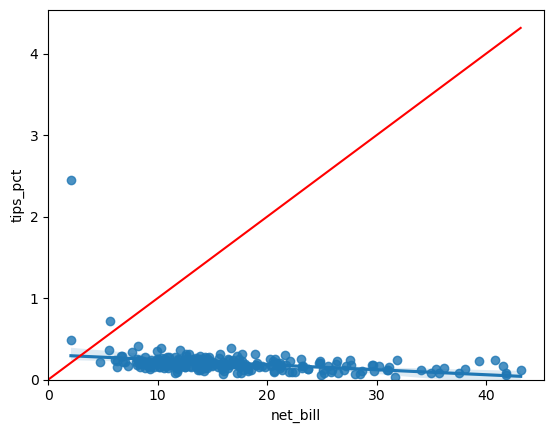

In [6]:
sns.regplot(y = "tips_pct", x = "net_bill", data = tips)
x = np.linspace(0, tips["net_bill"].max(), 100)
y = .1*x
plt.plot(x, y, "-r", label="linha dos 10%")
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [7]:
reg = smf.ols("net_bill ~ tips_pct", data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               net_bill   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.52e-06
Time:                        03:35:46   Log-Likelihood:                -842.41
No. Observations:                 244   AIC:                             1689.
Df Residuals:                     242   BIC:                             1696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7901      0.782     25.296      0.000      18.249      21.331
tips_pct     -14.8542      3.013     -4.931      0.000     -20.789      -8.920
==============================================================================
Omnibus:                       49.295   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.933
Skew:                           1.206   Prob(JB):                     8.82e-17
Kurtosis:                       4.207   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [8]:
print("Conseguimos reparar uma diferença grande de um gráfico para outro. Nesse estamos analisando a conta liquida com a porcentagem da gorjeta e conseguimos perceber que quanto maior for o valor da conta, menor é a porcentagem da gorjeta.")

Conseguimos reparar uma diferença grande de um gráfico para outro. Nesse estamos analisando a conta liquida com a porcentagem da gorjeta e conseguimos perceber que quanto maior for o valor da conta, menor é a porcentagem da gorjeta.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [13]:
#1: 
reg = smf.ols("net_bill ~ tips_pct", data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               net_bill   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.52e-06
Time:                        03:49:26   Log-Likelihood:                -842.41
No. Observations:                 244   AIC:                             1689.
Df Residuals:                     242   BIC:                             1696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7901      0.782     25.296      0.000      18.249      21.331
tips_pct     -14.8542      3.013     -4.931      0.000     -20.789      -8.920
==============================================================================
Omnibus:                       49.295   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.933
Skew:                           1.206   Prob(JB):                     8.82e-17
Kurtosis:                       4.207   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#1: 
pred_tip_pct = reg.fittedvalues
pred_tip_pct

0      18.851209
1      16.949267
2      16.820903
3      17.376332
4      17.234106
         ...    
239    15.984901
240    18.610212
241    18.352781
242    18.172450
243    16.966055
Length: 244, dtype: float64

In [17]:
# 2: 
tips['net_bill'].values

array([15.98,  8.68, 17.51, 20.37, 20.98, 20.58,  6.77, 23.76, 13.08,
       11.55,  8.56, 30.26, 13.85, 15.43, 11.81, 17.66,  8.66, 12.58,
       13.47, 17.3 , 13.84, 17.54, 13.54, 31.84, 16.64, 15.47, 11.37,
       10.69, 17.4 , 16.65,  8.1 , 15.85, 12.06, 18.24, 14.51, 20.46,
       14.31, 13.86, 16.38, 26.27, 13.8 , 14.92, 10.88,  8.36, 24.8 ,
       15.29, 17.23, 26.4 , 26.5 , 15.04, 10.04,  7.69, 29.61,  8.38,
       21.22, 15.98, 35.01, 24.91,  9.48, 41.54, 17.08, 11.81,  9.04,
       14.53, 14.95, 16.93, 13.98,  2.07, 18.22, 12.92, 10.05, 14.07,
       23.72, 20.28, 12.53,  9.26, 14.84, 23.2 , 19.76, 14.58, 16.44,
       13.26,  8.24, 27.68, 13.95, 29.66, 11.03, 14.28, 18.86, 18.16,
       25.97, 18.99,  4.75, 12.02, 19.5 , 35.44, 23.28, 10.53, 18.01,
       10.96,  8.85, 12.38, 41.8 , 18.94, 16.84, 13.72, 16.43, 20.92,
       14.48, 10.31, 11.  ,  6.25, 34.07, 21.4 , 21.71, 13.81, 24.86,
        9.15, 10.63, 21.16,  9.38, 11.74, 11.76, 13.95,  9.96, 25.6 ,
        7.04, 12.52,

In [14]:
# 2: obtenha o valor predito para tip como tip_pct * net_bill
pred_tip = pred_tip_pct * tips['net_bill'].values
pred_tip


0      301.242314
1      147.119638
2      294.534020
3      353.955889
4      361.571549
          ...    
239    369.411054
240    468.605129
241    379.351973
242    292.031275
243    267.724347
Length: 244, dtype: float64

In [19]:
# 3: calcule o  𝑅2 do modelo para tip
from sklearn.metrics import r2_score
r_2 = r2_score(tips['tip'].values, pred_tip)
r_2

-53858.97449375789

In [20]:
# 4: compare esse  𝑅2 com o do item 1
print("Pela minha analise, o R2 do item 1 é maior do que o R2 encontrado do modelo acima, portanto do item 1 é melhor.")

Pela minha analise, o R2 do item 1 é maior do que o R2 encontrado do modelo acima, portanto do item 1 é melhor.
